In [2]:
import os
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
os.chdir(parent_directory)
print("Working directory:", os.getcwd())

Working directory: c:\Users\benjo\OneDrive\Data Science Masters\DSMP\dsmp-2024-group-19


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from fast_tools import get_all_tapes
from tools import get_Tapes

resample_periods = ["1s", "2s", "5s", "10s", "15s", "30s", "1min", "2min", "5min"]

raw_tapes = get_Tapes(125,0)

hc_df = pd.DataFrame(columns=resample_periods)

Opening UoB_Set01_2025-01-02tapes.csv
Opening UoB_Set01_2025-01-03tapes.csv
Opening UoB_Set01_2025-01-06tapes.csv
Opening UoB_Set01_2025-01-07tapes.csv
Opening UoB_Set01_2025-01-08tapes.csv
Opening UoB_Set01_2025-01-09tapes.csv
Opening UoB_Set01_2025-01-10tapes.csv
Opening UoB_Set01_2025-01-13tapes.csv
Opening UoB_Set01_2025-01-14tapes.csv
Opening UoB_Set01_2025-01-15tapes.csv
Opening UoB_Set01_2025-01-16tapes.csv
Opening UoB_Set01_2025-01-17tapes.csv
Opening UoB_Set01_2025-01-20tapes.csv
Opening UoB_Set01_2025-01-21tapes.csv
Opening UoB_Set01_2025-01-22tapes.csv
Opening UoB_Set01_2025-01-23tapes.csv
Opening UoB_Set01_2025-01-24tapes.csv
Opening UoB_Set01_2025-01-27tapes.csv
Opening UoB_Set01_2025-01-28tapes.csv
Opening UoB_Set01_2025-01-29tapes.csv
Opening UoB_Set01_2025-01-30tapes.csv
Opening UoB_Set01_2025-01-31tapes.csv
Opening UoB_Set01_2025-02-03tapes.csv
Opening UoB_Set01_2025-02-04tapes.csv
Opening UoB_Set01_2025-02-05tapes.csv
Opening UoB_Set01_2025-02-06tapes.csv
Opening UoB_

In [5]:
from hurst import compute_Hc

for period in resample_periods:
    tapes_data = [t["Price"].resample(period).last().ffill().to_numpy() for t in raw_tapes]

    data_array = np.array(tapes_data)

    hurst_results = []

    for i in range(data_array.shape[0]):
        H, c, data = compute_Hc(data_array[i])
        hurst_results.append(H)

    hc_df[period] = hurst_results
    print(f"Period {period} done")
    

C:\Users\benjo\AppData\Local\Temp\ipykernel_4640\1603852839.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data_array = np.array(tapes_data)


Period 1s done
Period 2s done
Period 5s done
Period 10s done
Period 15s done
Period 30s done
Period 1min done
Period 2min done
Period 5min done


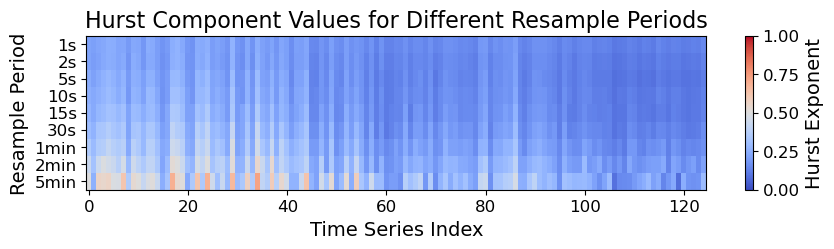

In [27]:
# plot a heatmap of hurst component values for each resample period
plt.figure(figsize=(10, 2))
plt.imshow(hc_df.T, cmap='coolwarm', aspect='auto', interpolation='none', vmin=0, vmax=1)
# colorbar with values 0-1
cbar = plt.colorbar(label='Hurst Exponent')
cbar.set_label('Hurst Exponent', fontsize=14)  # Set font size for colorbar label
cbar.ax.tick_params(labelsize=12)  # Set font size for colorbar ticks
plt.yticks(range(len(resample_periods)), resample_periods, fontsize=12)  # Adjust font size
plt.xticks(fontsize=12)  # Adjust font size
plt.ylabel('Resample Period', fontsize=14)  # Set font size for ylabel
plt.xlabel('Time Series Index', fontsize=14)  # Set font size for xlabel
plt.title('Hurst Component Values for Different Resample Periods', fontsize=16)  # Set font size for title
plt.show()

